## Scale Features and Build Model
### Scales Raw Features

Import CSV of Aggregated Darshan Logs <br>
Apply Log10 and Percent Scaling

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./raws.csv",lineterminator='\n',sep = ',' ,error_bad_lines=False)
#df.mean()

In [3]:
df = df.drop(df.columns[0],axis = 1)
df = df.drop(df.columns[0],axis = 1)
f = pd.DataFrame()

In [4]:
df

,posix_read_time,posix_write_time,posix_meta_time,posix_bytes_read,posix_bytes_read_100,posix_bytes_read_1K,posix_bytes_read_10K,posix_bytes_read_100K,posix_bytes_read_1lM,posix_bytes_read_4M,...,posix_m_align,lustre_number_of_files,lustre_mdts,lustre_osts,lustre_stripe_size,lustre_stripe_offset,lustre_stripe_width,lustre_number_of_osts,jobid,path
0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1.0,36.000000,1048576.0,0.0,4.0,4.0,9042391.0,../results/USER375904U_sss2_id9042391_9-26-414...
1,104.611641,10.024055,20.060841,2.390891e+10,147688.0,141853.0,33215.0,261267.0,51049.0,0.0,...,13704.0,176.0,1.0,360.000000,1048576.0,0.0,176.0,147.0,9868242.0,../results/USER382862U_SpEC_id9868242_4-29-741...
2,124.560730,42.051125,54.839272,5.019637e+10,332059.0,684893.0,130143.0,919688.0,2515.0,0.0,...,6704.0,224.0,1.0,360.000000,1048576.0,0.0,224.0,186.0,9029683.0,../results/USER264205U_SpEC_id9029683_9-20-580...
3,25763.292969,582.297363,24.895737,5.488943e+12,30785.0,767.0,508381.0,2040.0,13683.0,626216.0,...,2320.0,290.0,1.0,54.993103,1048576.0,0.0,290.0,52.0,9165166.0,../results/USER341996U_CCTM_v52_Linux2_x86_64i...
4,154.534821,681.548279,658.484985,2.293203e+10,588029.0,2926599.0,425127.0,336133.0,98.0,0.0,...,6328.0,201.0,1.0,360.000000,1048576.0,0.0,201.0,158.0,8269019.0,../results/USER141481U_SpEC_id8269019_3-3-4542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875282,138.354477,82.278084,194.485565,5.593977e+10,216146.0,535152.0,99814.0,889010.0,12485.0,0.0,...,9920.0,124.0,1.0,360.000000,1048576.0,0.0,124.0,110.0,7759072.0,../results/USER336298U_SpEC_id7759072_10-30-62...
875283,54.443073,231.440857,25.271391,1.465277e+09,3099.0,0.0,180662.0,0.0,0.0,0.0,...,8704.0,1088.0,1.0,360.000000,1048576.0,0.0,1088.0,359.0,7275819.0,../results/USER331454U_pw.x_id7275819_8-2-4790...
875284,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,36.000000,1048576.0,0.0,5.0,5.0,8305062.0,../results/USER371284U_sss2_id8305062_3-14-211...
875285,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,1.0,36.000000,1048576.0,0.0,2.0,1.0,31428.0,../results/USER303986U_testnodes_opt.x_id31428...


In [5]:

df = df.dropna(axis=0, how='any')
df.columns

Index(['posix_read_time', 'posix_write_time', 'posix_meta_time',
       'posix_bytes_read', 'posix_bytes_read_100', 'posix_bytes_read_1K',
       'posix_bytes_read_10K', 'posix_bytes_read_100K', 'posix_bytes_read_1lM',
       'posix_bytes_read_4M', 'posix_bytes_read_10M', 'posix_bytes_read_100M',
       'posix_bytes_read_1G', 'posix_bytes_read_PLUS', 'posix_bytes_write',
       'posix_bytes_write_100', 'posix_bytes_write_1K',
       'posix_bytes_write_10K', 'posix_bytes_write_100K',
       'posix_bytes_write_1M', 'posix_bytes_write_4M', 'posix_bytes_write_10M',
       'posix_bytes_write_100M', 'posix_bytes_write_1G',
       'posix_bytes_write_PLUS', 'posix_opens', 'posix_reads', 'posix_writes',
       'posix_seeks', 'posix_stats', 'posix_mmaps', 'posix_fsyncs',
       'posix_fdsyncs', 'posix_rename_sources', 'posix_rename_targets',
       'posix_renamed_from', 'posix_renamed_mode', 'posix_number_of_files',
       'nprocs', 'posix_f_align', 'posix_m_align', 'lustre_number_of_files',
   

In [6]:
#files
f['log10_p_files'] = df['posix_number_of_files'] 
f['log10_l_files'] = df['lustre_number_of_files']

In [7]:
#accesses
df['p_accesses'] = df['posix_reads'] + df['posix_writes']
f['log10_p_accesses'] = df['p_accesses']

f['log10_p_accesses']

0               0.0
1          880136.0
2         2379598.0
3         8903411.0
4         7846387.0
            ...    
875282    2234152.0
875283     197651.0
875284          0.0
875285          0.0
875286    6065006.0
Name: log10_p_accesses, Length: 875287, dtype: float64

In [8]:
#bytes
f['log10_p_bytes'] = df['posix_bytes_read'] 

In [9]:
f['log10_p_opens'] = df['posix_opens']
f['log10_p_seeks'] = df['posix_seeks']
f['log10_p_stats'] = df['posix_stats']
f['log10_p_mode'] = df['posix_renamed_mode']

In [10]:
f['log10_l_n_osts'] = df['lustre_number_of_osts']
f['log10_l_stripe_w'] = df['lustre_stripe_width']
f['log10_l_mdts'] = df['lustre_mdts']

In [11]:
f['log10_p_nprocs'] = df['nprocs']
f['log10_p_falign'] = df['posix_f_align']
f['log10_p_malign'] = df['posix_m_align']

In [12]:
f['perc_p_reads'] = df['posix_reads'] 
f['perc_p_writes'] = df['posix_writes'] 

In [13]:
f['perc_p_bytes_read_100'] = df['posix_bytes_read_100']
f['perc_p_bytes_read_1K'] = df['posix_bytes_read_1K']
f['perc_p_bytes_read_10K'] = df['posix_bytes_read_10K'] 
f['perc_p_bytes_read_100K'] = df['posix_bytes_read_100K']
f['perc_p_bytes_read_1M'] = df['posix_bytes_read_1lM']
f['perc_p_bytes_read_4M'] = df['posix_bytes_read_4M']
f['perc_p_bytes_read_10M'] = df['posix_bytes_read_10M']
f['perc_p_bytes_read_100M'] = df['posix_bytes_read_100M']
f['perc_p_bytes_read_1G'] = df['posix_bytes_read_1G']
f['perc_p_bytes_read_PLUS'] = df['posix_bytes_read_PLUS']

In [14]:
f['perc_p_bytes_write_100'] = df['posix_bytes_write_100']
f['perc_p_bytes_write_1K'] = df['posix_bytes_write_1K']
f['perc_p_bytes_write_10K'] = df['posix_bytes_write_10K']
f['perc_p_bytes_write_100K'] = df['posix_bytes_write_100K']
f['perc_p_bytes_write_1M'] = df['posix_bytes_write_1M']
f['perc_p_bytes_write_4M'] = df['posix_bytes_write_4M']
f['perc_p_bytes_write_10M'] = df['posix_bytes_write_10M']
f['perc_p_bytes_write_100M'] = df['posix_bytes_write_100M']
f['perc_p_bytes_write_1G'] = df['posix_bytes_write_1G']
f['perc_p_bytes_write_PLUS'] = df['posix_bytes_write_PLUS']


f = f.replace(-np.inf, -1)
f = f.replace(np.nan, 0)

In [15]:
df['time'] = df['posix_write_time'].astype('float') + df['posix_read_time'].astype('float') + df['posix_meta_time'].astype('float')

In [16]:
df['bytes'] = df['posix_bytes_read'].astype('float') + df['posix_bytes_write'].astype('float')

In [17]:
df = df[df['bytes'] >99999999]


In [18]:

f['throughput'] = df['bytes'].astype('float') / df['time']

f = f[f['throughput'] >0]

In [19]:
#delete columns with all zeros
f = f.loc[:, (f != 0).any(axis=0)]

#remove infinite values
f = f.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

f.max()

log10_p_files              1.219270e+05
log10_l_files              1.219270e+05
log10_p_accesses           2.251942e+10
log10_p_bytes              3.038456e+14
log10_p_opens              5.531094e+08
log10_p_seeks              1.445220e+10
log10_p_stats              6.522921e+07
log10_p_mode               5.337293e+07
log10_l_n_osts             3.600000e+02
log10_l_stripe_w           7.438575e+06
log10_l_mdts               1.000000e+00
log10_p_nprocs             3.200000e+05
log10_p_falign             1.422540e+11
log10_p_malign             1.085312e+06
perc_p_reads               2.237846e+10
perc_p_writes              1.302770e+10
perc_p_bytes_read_100      5.221517e+08
perc_p_bytes_read_1K       2.074657e+10
perc_p_bytes_read_10K      1.536278e+09
perc_p_bytes_read_100K     1.515506e+08
perc_p_bytes_read_1M       4.044503e+08
perc_p_bytes_read_4M       6.561462e+07
perc_p_bytes_read_10M      2.083200e+06
perc_p_bytes_read_100M     2.872090e+05
perc_p_bytes_read_1G       1.792000e+06


In [20]:
t = pd.DataFrame()
t['throughput'] = f['throughput']
f = f.drop(labels = 'throughput', axis = 1)
f

,log10_p_files,log10_l_files,log10_p_accesses,log10_p_bytes,log10_p_opens,log10_p_seeks,log10_p_stats,log10_p_mode,log10_l_n_osts,log10_l_stripe_w,...,perc_p_bytes_read_1G,perc_p_bytes_write_100,perc_p_bytes_write_1K,perc_p_bytes_write_10K,perc_p_bytes_write_100K,perc_p_bytes_write_1M,perc_p_bytes_write_4M,perc_p_bytes_write_10M,perc_p_bytes_write_100M,perc_p_bytes_write_1G
1,799.0,176.0,880136.0,2.390891e+10,8858.0,319241.0,34901.0,37230.0,147.0,176.0,...,0.0,202780.0,16078.0,21989.0,3156.0,1061.0,0.0,0.0,0.0,0.0
2,360.0,224.0,2379598.0,5.019637e+10,62398.0,1107764.0,270222.0,27594.0,186.0,224.0,...,0.0,18852.0,264906.0,22246.0,4282.0,14.0,0.0,0.0,0.0,0.0
3,290.0,290.0,8903411.0,5.488943e+12,8711.0,2010273.0,28432.0,115194.0,52.0,290.0,...,0.0,7302089.0,52045.0,73.0,9.0,25830.0,756.0,0.0,0.0,0.0
4,319.0,201.0,7846387.0,2.293203e+10,23158.0,6015926.0,400399.0,31536.0,158.0,201.0,...,0.0,489873.0,2821931.0,240372.0,17983.0,242.0,0.0,0.0,0.0,0.0
6,428.0,190.0,6647935.0,5.209185e+10,69261.0,4608438.0,410846.0,38982.0,158.0,190.0,...,0.0,255023.0,1927630.0,186048.0,11509.0,158.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875280,1.0,1.0,57344.0,3.006477e+10,1808.0,59128.0,12.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,28672.0,0.0,0.0,0.0,0.0
875281,13.0,4.0,102439.0,7.467916e+08,193.0,91.0,385.0,4818.0,4.0,4.0,...,0.0,33.0,23.0,10927.0,0.0,0.0,0.0,0.0,0.0,0.0
875282,624.0,124.0,2234152.0,5.593977e+10,35112.0,1035457.0,159180.0,16644.0,110.0,124.0,...,0.0,51807.0,397643.0,27690.0,3198.0,1207.0,0.0,0.0,0.0,0.0
875283,1088.0,1088.0,197651.0,1.465277e+09,2112.0,12509.0,4198.0,473916.0,359.0,1088.0,...,0.0,28.0,0.0,38.0,0.0,13824.0,0.0,0.0,0.0,0.0


In [21]:
df = df[df.index.isin(t.index)]
t = t.reset_index()
f = f.reset_index()
f = f.drop(f.columns[0] , axis =1)
t = t.drop(t.columns[0] , axis =1)

In [22]:
f = StandardScaler().fit_transform(f)

In [23]:
t

,throughput
0,1.803194e+08
1,2.282342e+08
2,2.083669e+08
3,1.724841e+07
4,4.581690e+07
...,...
588403,5.482767e+08
588404,2.136637e+07
588405,1.362498e+08
588406,1.942413e+07


In [24]:
print(t.min())
print(t.max())

throughput    76.744419
dtype: float64
throughput    2.344536e+09
dtype: float64


In [25]:
rseed = 0
t_size = 0.1

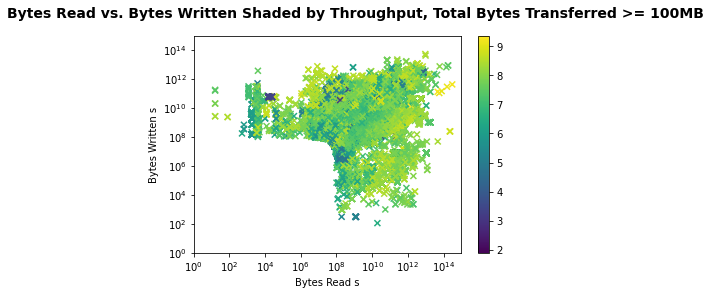

In [32]:

fig = plt.figure()
fig.suptitle('Bytes Read vs. Bytes Written Shaded by Throughput, Total Bytes Transferred >= 100MB', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
sp = ax.scatter(df['posix_bytes_read'],df['posix_bytes_write'], marker = 'x',c = np.log10(t['throughput']),cmap='viridis')

ax.set_xlabel('Bytes Read s')
ax.set_ylabel('Bytes Written s')
ax.loglog()
#plt.autoscale(enable=True, axis='y')
plt.xlim(10**0,10**15)
plt.ylim(10**0,10**15)
fig.colorbar(sp)
plt.show()

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error


In [28]:
from sklearn.linear_model import LinearRegression
for i in range(3):
    
    rseed = random.randint(1,10000)
    print(rseed)
    train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size=t_size, random_state=rseed)

    reg = LinearRegression().fit(train_data, train_labels)

    predicted_labels = reg.predict(test_data)

    print("Mean True Value: \t",int(test_labels.mean() ))
    print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
    print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
    print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
    print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
    print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")
    

2304
Mean True Value: 	 95557030
Mean Absolute Error: 	 57193142
Mean Squared Error:  9159394993309680.0
Root Mean Squared Error:  95704728.16590454
MAPE :13.90732356627179
R2: 0.2762398672198274

4858
Mean True Value: 	 95211860
Mean Absolute Error: 	 57447149
Mean Squared Error:  9696730441393262.0
Root Mean Squared Error:  98471977.9500405
MAPE :19.971745753429353
R2: 0.2340923727738773

1932
Mean True Value: 	 94940374
Mean Absolute Error: 	 57047431
Mean Squared Error:  9058964564376018.0
Root Mean Squared Error:  95178592.99430738
MAPE :13.643806571266154
R2: 0.2717333610312159



In [29]:
import xgboost as xg

In [30]:
#EXTREME GRADIENT BOOST

for i in range(3):
    rseed = random.randint(1,10000)
    print(rseed)

    train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size=t_size, random_state=rseed)
    xgb_r = xg.XGBRegressor(n_estimators = 1000, seed = 123)
    xgb_r.fit(train_data, train_labels)
    predicted_labels = xgb_r.predict(test_data)

    print("Mean True Value: \t",int(test_labels.mean() ))
    print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
    print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
    print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
    print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
    print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")
    

9619
Mean True Value: 	 94755134
Mean Absolute Error: 	 18211293
Mean Squared Error:  1337993203338080.0
Root Mean Squared Error:  36578589.41154073
MAPE :1.1491019309627386
R2: 0.8924750506244415

1814
Mean True Value: 	 94867525
Mean Absolute Error: 	 18006477
Mean Squared Error:  1287426527591657.2
Root Mean Squared Error:  35880726.40836104
MAPE :1.6971146192431594
R2: 0.8962156663502199

3773
Mean True Value: 	 95372623
Mean Absolute Error: 	 18154015
Mean Squared Error:  1286976474545982.8
Root Mean Squared Error:  35874454.34492325
MAPE :1.2867656879329907
R2: 0.8977113895045059



In [31]:
from sklearn.tree import DecisionTreeRegressor

for i in range(3):
    rseed = random.randint(1,10000)
    print(rseed)

    train_data, test_data, train_labels, test_labels = train_test_split(f,t, test_size= t_size, random_state=rseed)
    
    reg = DecisionTreeRegressor(max_depth = 4)   
    

    reg.fit(train_data, train_labels)
    predicted_labels = reg.predict(test_data)


    print("Mean True Value: \t",int(test_labels.mean() ))
    print("Mean Absolute Error: \t", int(mean_absolute_error(test_labels, predicted_labels) ))
    print("Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels) )
    print("Root Mean Squared Error: ", mean_squared_error(test_labels, predicted_labels, squared = False) )
    print("MAPE :" + str(mean_absolute_percentage_error( test_labels, predicted_labels )))
    print("R2: " + str(r2_score(test_labels,predicted_labels)) + "\n")
    
    

1805
Mean True Value: 	 94966868
Mean Absolute Error: 	 33563042
Mean Squared Error:  3393765972370551.5
Root Mean Squared Error:  58256038.07649943
MAPE :37.33825849381807
R2: 0.7258908421466567

3906
Mean True Value: 	 95069446
Mean Absolute Error: 	 33412157
Mean Squared Error:  3300764536716695.0
Root Mean Squared Error:  57452280.51798027
MAPE :24.280783311141306
R2: 0.7385441586149623

7585
Mean True Value: 	 94563971
Mean Absolute Error: 	 32970799
Mean Squared Error:  3188301303149065.5
Root Mean Squared Error:  56465044.96721016
MAPE :9.353637177832688
R2: 0.7458677521565487

